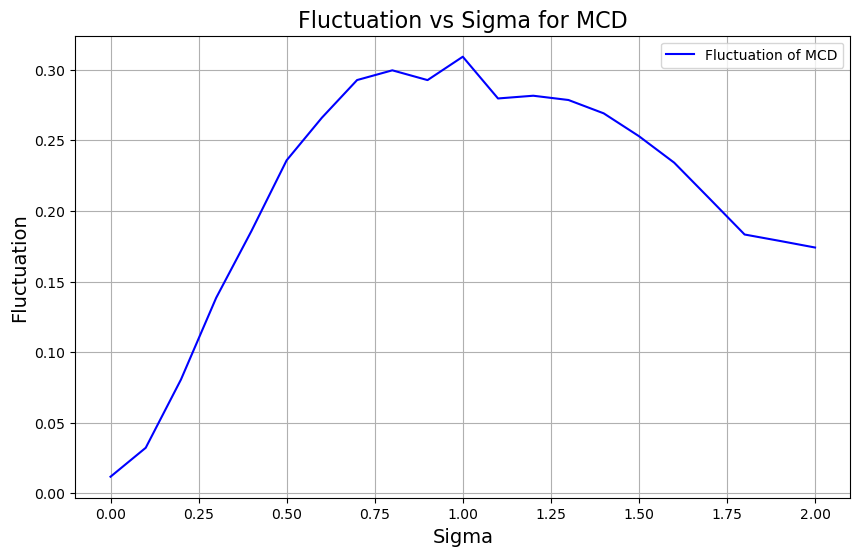

Sigma: 0.0, Fluctuation: 0.011778172789441843
Sigma: 0.1, Fluctuation: 0.032274041165845604
Sigma: 0.2, Fluctuation: 0.08059400402909553
Sigma: 0.30000000000000004, Fluctuation: 0.13849177225890913
Sigma: 0.4, Fluctuation: 0.18575194803382292
Sigma: 0.5, Fluctuation: 0.23585571592722235
Sigma: 0.6000000000000001, Fluctuation: 0.2660141250646228
Sigma: 0.7000000000000001, Fluctuation: 0.2926983900116936
Sigma: 0.8, Fluctuation: 0.29958743961618817
Sigma: 0.9, Fluctuation: 0.29265934494041995
Sigma: 1.0, Fluctuation: 0.30921628193321077
Sigma: 1.1, Fluctuation: 0.2796567861313618
Sigma: 1.2000000000000002, Fluctuation: 0.281590936939951
Sigma: 1.3, Fluctuation: 0.27856715490446426
Sigma: 1.4000000000000001, Fluctuation: 0.26912019191226433
Sigma: 1.5, Fluctuation: 0.2529631199625513
Sigma: 1.6, Fluctuation: 0.23421383180639999
Sigma: 1.7000000000000002, Fluctuation: 0.20885205475900748
Sigma: 1.8, Fluctuation: 0.18331166471197036
Sigma: 1.9000000000000001, Fluctuation: 0.1787726834940185

In [3]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L = 400  # Length
t = 0.75  # hopping amplitude
dt = -0.25
sigma_values = np.arange(0, 2.1, 0.1)  # Range for sigma from 0 to 2 with interval 0.25
time_range = np.linspace(0, L / 3, L)  # Time values

# Prepare the plot
plt.figure(figsize=(10, 6))

# Loop over sigma values
fluctuations = []  # List to store fluctuation values for each sigma
for sigma in sigma_values:
    # Initialize Hamiltonian (SHH) based on the current sigma value
    w = t - dt
    v = t + dt
    SHH = np.zeros((L, L), dtype=complex)
    
    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1)) ** sigma
        w_i = w * ((i + 1) / (L - 1)) ** sigma
        if i % 2 == 0:
            SHH[i + 1, i] = v_i
            SHH[i, i + 1] = v_i
        if i % 2 != 0:
            SHH[i + 1, i] = w_i
            SHH[i, i + 1] = w_i
    
    # Compute eigenvalues and eigenvectors of SHH
    eigenvalues, eigenvectors = np.linalg.eigh(SHH)
    
    # Initialize matrices GA, GB for time evolution
    GA = np.zeros((L, L))
    GB = np.zeros((L, L))
    for i in range(len(eigenvalues)):
        if i % 2 == 0:
            GA[i, i] = 1
    for i in range(len(eigenvalues)):
        if i % 2 != 0:
            GB[i, i] = 1

    G = GA - GB
    X = np.zeros((L, L))
    X[0, 0] = -L / 4
    for i in range(len(eigenvalues)):
        if i % 2 == 0:
            X[i, i] = -L / 4 + i / 2
            X[i + 1, i + 1] = X[i, i]

    mid_matrix = G @ X

    # Compute initial state |psi>
    psi = initial_matrix(L)

    # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
    f_values = []
    for t_val in time_range:
        psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
        bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
        f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
        f_values.append(f_t.real)  # Take the real part of f(t)
    
    # Calculate fluctuation (variance of f_values)
    fluctuation = np.var(f_values)
    fluctuations.append(fluctuation)

# Plot fluctuation vs sigma
plt.plot(sigma_values, fluctuations, label='Fluctuation of MCD', color='blue')
plt.xlabel('Sigma', fontsize=14)
plt.ylabel('Fluctuation', fontsize=14)
plt.title('Fluctuation vs Sigma for MCD', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Print fluctuation values for each sigma
for sigma, fluct in zip(sigma_values, fluctuations):
    print(f'Sigma: {sigma}, Fluctuation: {fluct}')


KeyboardInterrupt: 

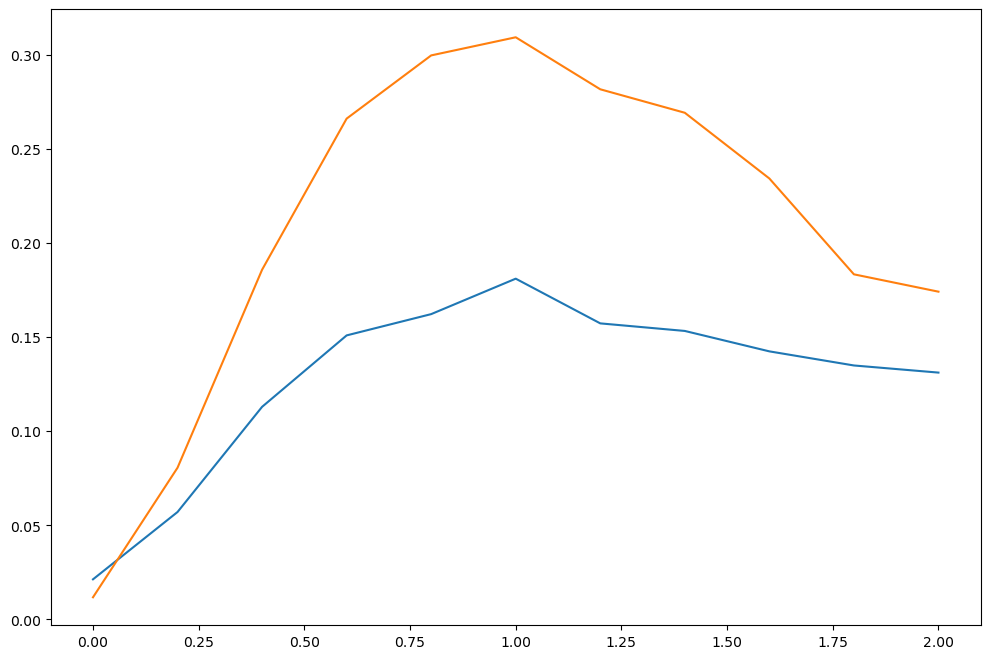

In [19]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L_values = [200, 400, 500]  # Different values of L
sigma_values = np.arange(0, 2.2, 0.2)  # Sigma range from 0 to 2 with interval 0.25

# Prepare the plot
plt.figure(figsize=(12, 8))

# Loop over different L values
for L in L_values:
    t = 0.75  # hopping amplitude
    dt = -0.25
    fluctuations = []  # List to store fluctuation values for each sigma
    
    for sigma in sigma_values:
        # Initialize Hamiltonian (SHH) based on the current sigma value
        w = t - dt
        v = t + dt
        SHH = np.zeros((L, L), dtype=complex)
        
        for i in range(L - 1):
            v_i = v * ((i + 1) / (L - 1)) ** sigma
            w_i = w * ((i + 1) / (L - 1)) ** sigma
            if i % 2 == 0:
                SHH[i + 1, i] = v_i
                SHH[i, i + 1] = v_i
            if i % 2 != 0:
                SHH[i + 1, i] = w_i
                SHH[i, i + 1] = w_i
        
        # Compute eigenvalues and eigenvectors of SHH
        eigenvalues, eigenvectors = np.linalg.eigh(SHH)
        
        # Initialize matrices GA, GB for time evolution
        GA = np.zeros((L, L))
        GB = np.zeros((L, L))
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                GA[i, i] = 1
        for i in range(len(eigenvalues)):
            if i % 2 != 0:
                GB[i, i] = 1

        G = GA - GB
        X = np.zeros((L, L))
        X[0, 0] = -L / 4
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                X[i, i] = -L / 4 + i / 2
                X[i + 1, i + 1] = X[i, i]

        mid_matrix = G @ X

        # Compute initial state |psi>
        psi = initial_matrix(L)

        # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
        time_range = np.linspace(0, L / 3, L)  # Time values
        f_values = []
        for t_val in time_range:
            psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
            bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
            f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
            f_values.append(f_t.real)  # Take the real part of f(t)
        
        # Calculate fluctuation (variance of f_values)
        fluctuation = np.var(f_values)
        fluctuations.append(fluctuation)
    
    # Plot fluctuation vs sigma for the current L
    plt.plot(sigma_values, fluctuations, label=f'L = {L}')

# Finalize the plot
plt.xlabel(r'$\Sigma$', fontsize=18)
plt.ylabel('Fluctuation', fontsize=18)
plt.title('Fluctuation vs Sigma for Different L Values', fontsize=20)
#plt.grid(True)
plt.legend(fontsize=18)
plt.show()


[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]
(500, 500)


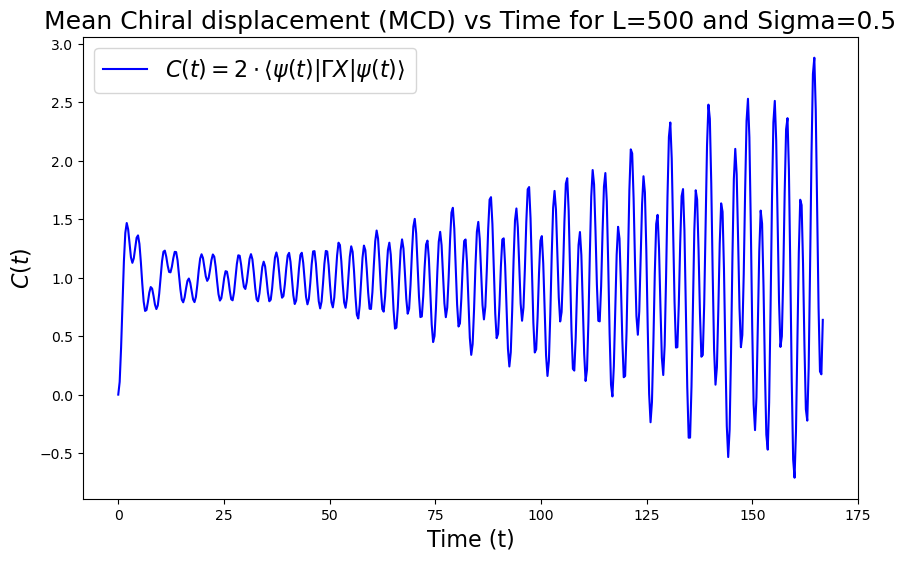

Average MCD: 1.0002825657888577
Fluctuation of MCD: 0.28087086520643767


In [16]:
import numpy as np
from scipy.linalg import expm
import math
import matplotlib.pyplot as plt


L= 500
t=0.75 #hopping amplitude
dt=-0.25
sigma=0.5  #warpping of space-time
w=t-dt
v=t+dt
SHH = np.zeros((L,L),dtype=complex )

for i in range (L-1):
            v_i = v * ((i + 1) /(L-1))**sigma
            w_i = w * ((i + 1) /(L-1))**sigma
            if i % 2 == 0:
              SHH[i+1,i]=v_i
              SHH[i,i+1]=v_i
            if i % 2 != 0:
             SHH[i+1,i]=w_i
             SHH[i,i+1]=w_i

eigenvalues, eigenvectors = np.linalg.eigh(SHH)

GA=np.zeros((L,L))
GB=np.zeros((L,L))
for i in range(len(eigenvalues)):
    if i % 2 == 0:
      GA[i,i]=1
for i in range(len(eigenvalues)):
    if i % 2 != 0:
      GB[i,i]=1


l=np.arange(-abs(L/4), abs(L/4) , 1 )
X= np.zeros((L,L))
X[0,0]=-L/4
for i in range(len(eigenvalues)):
        if i % 2 == 0:
         X[i,i]=-L/4+i/2
         X[i+1,i+1]=X[i,i]
G= GA-GB
print(G)
mid_matrix= G@X
print(X.shape)



# Function to calculate time evolution
def time_evolution(H, psi, t):
    """
    Calculate the time-evolved state |psi(t)> = exp(-iHt) |psi>
    """
    # Calculate the unitary evolution operator U = exp(-iHt)
    U = expm(-1j * H * t)
    # Evolve the state |psi>
    psi_t = np.dot(U, psi)
    return psi_t


eigenvalues, eigenvectors = np.linalg.eigh(SHH)

probability_density = np.abs(eigenvectors[:, L//2])**2 #------------------------------------------------------
# plt.figure() 
# plt.title(f'probability density corresponding to 0 energy with L= {L}, sigma={sigma}')

#plt.plot(np.arange(len(eigenvalues)), probability_density)
mid=L//2
# plt.plot(np.abs(eigenvectors[:, mid])**2, label=f'Eigenstate {mid+1} (E={eigenvalues[mid]:.2f}) , (blue)', color='blue')
# #t.plot(np.abs(eigenvectors[:, mid-1])**2, label=f'Eigenstate {i} (E={eigenvalues[i-1]:.2f}), (yellow)', color='yellow')
# #plt.yscale('log')
# plt.legend()
# plt.show()


# Input: Define the Hamiltonian H, initial state |psi>, and time t
H = SHH    #Hamiltonian
#---------------------------
#initinal state
# def initial_matrix(N):
#     """
#     Creates an N x 1 matrix with all entries 0 except the N/2 entry (1-based index).
#     """
#     if N % 2 != 0:
#         raise ValueError("N must be even for N/2 to be an integer.")
    
#     matrix = np.zeros((N, 1))  # Create an N x 1 matrix filled with zeros
#     matrix[N // 2 - 1, 0] = 1  # Set the N/2-th entry (1-based index) to 1
#     return matrix


def initial_matrix(N):
    """
    Create a 1D array of length N with all elements 0 except the middle element, which is 1.
    """
    if N <= 0:
        raise ValueError("N must be a positive integer.")
    
    array = np.zeros(N)  # Create a 1D array of length N with all zeros
    middle_index = N // 2  # Calculate the middle index (integer division)
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Example usage
N = L  # Length of the array
psi = initial_matrix(N)


#-----------------------------------------------------------------------------------
 
#psi = initial_matrix(N)
#psi= eigenvectors[:,mid]



#---------------------------

#--------------------------------------------------------------------------------------------------------------

time_range = np.linspace(0, L/3, L)  # Time values from 0 to 200

# Calculate f(t) = 2 * <psi(t)|psi(t)> for each time step
f_values = []
for t in time_range:
    psi_t = time_evolution(H, psi, t)       # |psi(t)>
    bra_psi_t = np.conjugate(psi_t.T)       # <psi(t)|
    f_t = 2 * (bra_psi_t @mid_matrix@ psi_t)     # 2 * <psi(t)|psi(t)>
    f_values.append(f_t.real)              # Take the real part of f(t)


average = sum(f_values) / len(f_values)
fluctuation= np.var(f_values)

# Plotting f(t) against time
plt.figure(figsize=(10, 6))
plt.plot(time_range, f_values, label=r'$C(t) = 2 \cdot \langle \psi(t) |\Gamma X| \psi(t) \rangle$ ', color='blue')
plt.legend([f"Average C(t): {average:.4f})"], loc="upper left")
plt.xlabel('Time (t)', fontsize=16)
plt.ylabel(r'$C(t)$', fontsize=16)
plt.title(f'Mean Chiral displacement (MCD) vs Time for L={L} and Sigma={sigma}',fontsize=18)
plt.legend(fontsize=16)
#plt.grid(True)
plt.show()



#-----------------------------------------------------------------------------------------------------------------


print("Average MCD:", average)
print("Fluctuation of MCD:", fluctuation)





# # Print results
# print("Time-evolved state |psi(t)>:", psi_t)
# print("Bra of the state <psi(t)|:", bra_psi_t)
